**Import library**

In [3]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import *
import warnings

#Ignoriamo i possibili warnings che possiamo avere
warnings.filterwarnings("ignore")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Import dataset**

In [4]:
data = pd.read_csv('/content/Indian Liver Patient Dataset (ILPD) 2.csv')    #Lettura del file train

print(data.head())
print(data.columns)
print('entry totali per ilpd: ', len(data)) #Totale entry = 583

   age  gender  tot_bilirubin  ...  sgot  alkphos  is_patient
0   65  Female            0.7  ...   3.3     0.90           1
1   62    Male           10.9  ...   3.2     0.74           1
2   62    Male            7.3  ...   3.3     0.89           1
3   58    Male            1.0  ...   3.4     1.00           1
4   72    Male            3.9  ...   2.4     0.40           1

[5 rows x 11 columns]
Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')
entry totali per ilpd:  583


In [5]:
data.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


**Data exploration (1) - clean dataset**

In [6]:
print(data.info())
#Notiamo che l'attributo 'Gender' è una stringa che può essere male/female e quindi sostituiamo
#male = 1; female = 0;
mapping = {'Male':1, 'Female':0}        #Creo un dizionario
data = data.replace({'gender':mapping}) #Faccio un replace all'attributo gender

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB
None


In [7]:
#Vediamo se esistono NaN 
nullValue = data.isnull().sum()
print('I valori nulli sono: ', nullValue)

#Di seguito sostituiamo tutti i NaN con 0
data.fillna({'alkphos':0}, inplace=True)


I valori nulli sono:  age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64


**Pie chart - diagnosi e gender pazienti**

Text(0.5, 1.0, 'Genere pazienti')

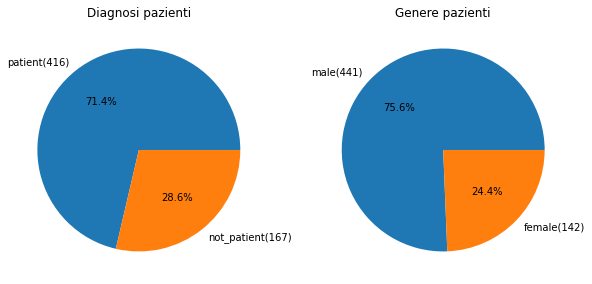

In [8]:
target_counts = data['is_patient'].value_counts().values
gender_counts=data['gender'].value_counts().values

fig1, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

target_sizes = data.groupby('is_patient').size()
axes[0].pie(x=target_counts, 
            labels=['patient({})'.format(target_sizes[1]), 'not_patient({})'.format(target_sizes[2])],
            autopct='%1.1f%%')
axes[0].set_title('Diagnosi pazienti')

gender_sizes = data.groupby('gender').size()
axes[1].pie(x=gender_counts,
            labels=['male({})'.format(gender_sizes[1]), 'female({})'.format(gender_sizes[0])],
            autopct="%1.1f%%")
axes[1].set_title('Genere pazienti')


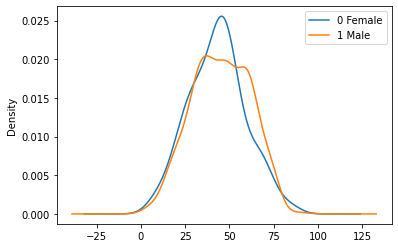

In [9]:
fig, ax = subplots()
df = data.groupby('gender').age
df.plot(kind='kde', ax=ax)    #kde = Kernel Density Estimation plot
ax.legend(["0 Female", "1 Male"]);

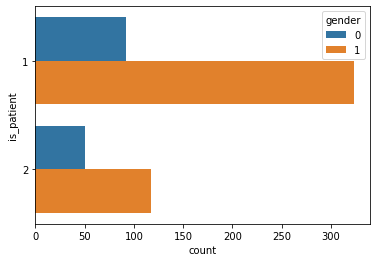

In [10]:
#Numeri di is_patient =1 e =2 divisi per gender 
sns.countplot(y=data.is_patient, hue=data.gender)

**LabelEncoder del genere**

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data.gender = le.fit_transform(data.gender)
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [0]:
data_original = data.copy()

**Normalizzazione dei dati**

In [0]:
from sklearn.preprocessing import MinMaxScaler

features=['age', 'gender', 'tot_bilirubin', 'direct_bilirubin','tot_proteins', 'albumin', 'ag_ratio','sgpt','sgot','alkphos','is_patient']
mms = MinMaxScaler()
data = mms.fit_transform(data)


In [0]:
data = pd.DataFrame(data=data, columns=features)

In [15]:
data.head()

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,0.709302,0.0,0.004021,0.000000,0.060576,0.003015,0.001626,0.594203,0.521739,0.321429,0.0
1,0.674419,1.0,0.140751,0.275510,0.310699,0.027136,0.018296,0.695652,0.500000,0.264286,0.0
2,0.674419,1.0,0.092493,0.204082,0.208598,0.025126,0.011791,0.623188,0.521739,0.317857,0.0
3,0.627907,1.0,0.008043,0.015306,0.058134,0.002010,0.002033,0.594203,0.543478,0.357143,0.0
4,0.790698,1.0,0.046917,0.096939,0.064485,0.008543,0.009961,0.666667,0.326087,0.142857,0.0


**Plot prima e dopo della normalizzazione**

Text(0.5, 1.0, 'Normalized data')

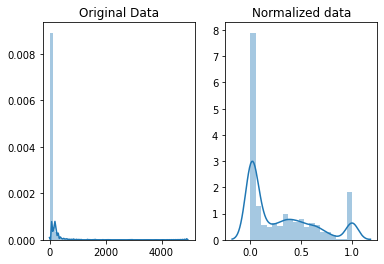

In [16]:
fig, ax = plt.subplots(1,2)
sns.distplot(data_original, ax=ax[0])
ax[0].set_title('Original Data')
sns.distplot(data, ax=ax[1])
ax[1].set_title('Normalized data')

**Matrice di correlazione**

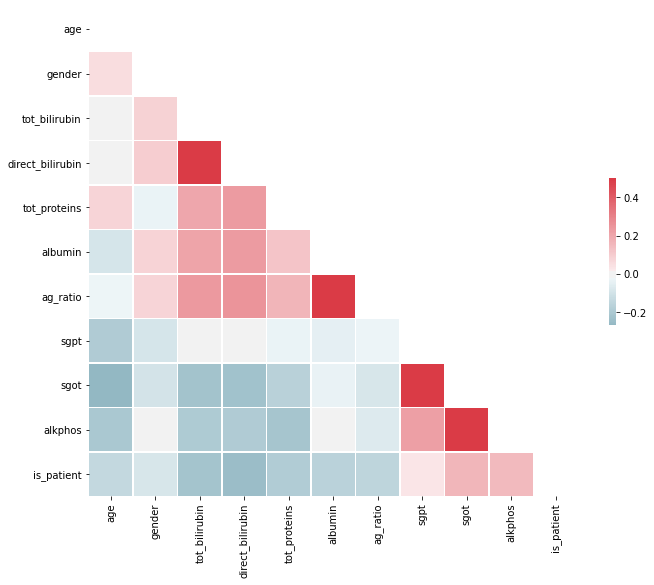

In [17]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .3})


**Correlation Matrix (II Parte)**

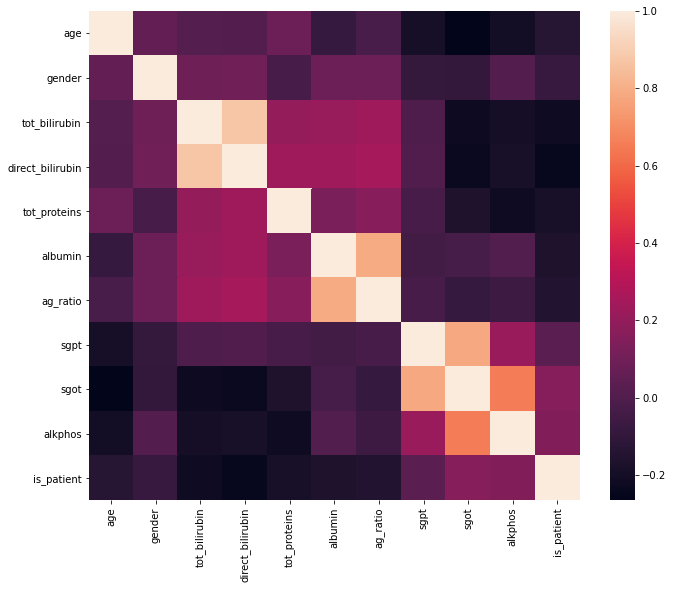

In [18]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr)

**Correlation matrix (III Parte)**

In [19]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.203418,-0.137351
gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,0.008541,-0.082416
tot_bilirubin,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.192539,-0.220208
direct_bilirubin,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.186023,-0.246046
tot_proteins,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.217864,-0.184866
albumin,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,0.004184,-0.163416
ag_ratio,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.062993,-0.151934
sgpt,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.223185,0.035008
sgot,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.654450,0.161388
alkphos,-0.203418,0.008541,-0.192539,-0.186023,-0.217864,0.004184,-0.062993,0.223185,0.654450,1.000000,0.148265


**Matrice di correlazione (III Parte) con algoritmo di clustering gerarchico**

{'color_list': ['b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b', 'b'],
 'dcoord': [[0.0, 0.6495393338620256, 0.6495393338620256, 0.0],
  [0.0, 0.758301153590285, 0.758301153590285, 0.6495393338620256],
  [0.0, 1.3354849422126556, 1.3354849422126556, 0.758301153590285],
  [0.0, 0.31923129306748893, 0.31923129306748893, 0.0],
  [0.0, 0.18432949851763383, 0.18432949851763383, 0.0],
  [0.0, 1.291467405736211, 1.291467405736211, 0.18432949851763383],
  [0.31923129306748893,
   1.3676004401495856,
   1.3676004401495856,
   1.291467405736211],
  [0.0, 1.3805880095779994, 1.3805880095779994, 1.3676004401495856],
  [0.0, 1.390097746292183, 1.390097746292183, 1.3805880095779994],
  [1.3354849422126556,
   1.683997486399839,
   1.683997486399839,
   1.390097746292183]],
 'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [70.0, 70.0, 92.5, 92.5],
  [55.0, 55.0, 81.25, 81.2

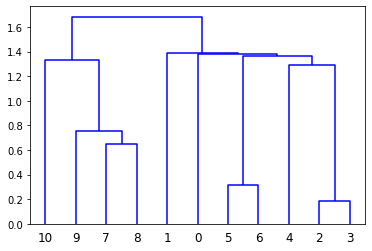

In [20]:
import scipy.cluster.hierarchy as spc

pdist = spc.distance.pdist(corr)
linkage = spc.linkage(pdist, 'single', 'correlation')
idx = spc.fcluster(linkage, 0.5*pdist.max(), 'distance')
spc.dendrogram(linkage, color_threshold=0)

*Esempio della dipendenza tra due grandezze*



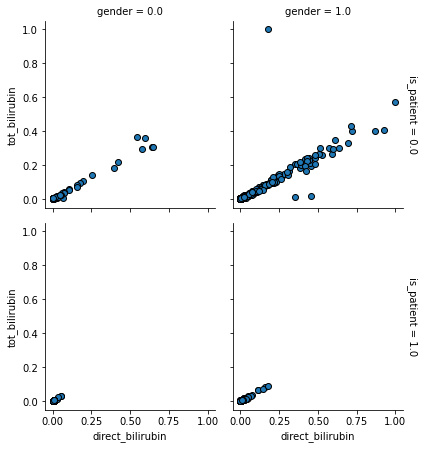

In [21]:
gen_totbili = sns.FacetGrid(data, col='gender', row='is_patient', margin_titles=True)
gen_totbili.map(plt.scatter, 'direct_bilirubin', 'tot_bilirubin', edgecolor='k')
plt.subplots_adjust(top=1)

*Esempio dell'indipendenza tra due grandezze*

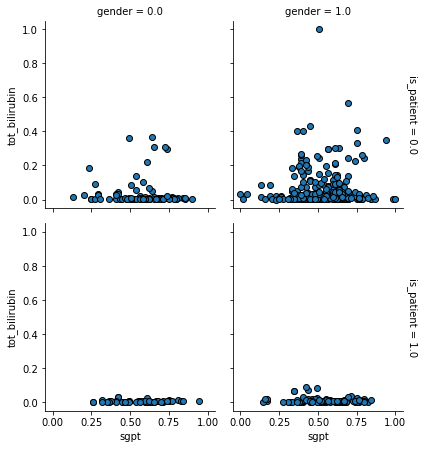

In [22]:
gen_totbili = sns.FacetGrid(data, col='gender', row='is_patient', margin_titles=True)
gen_totbili.map(plt.scatter, 'sgpt', 'tot_bilirubin', edgecolor='k')
plt.subplots_adjust(top=1)

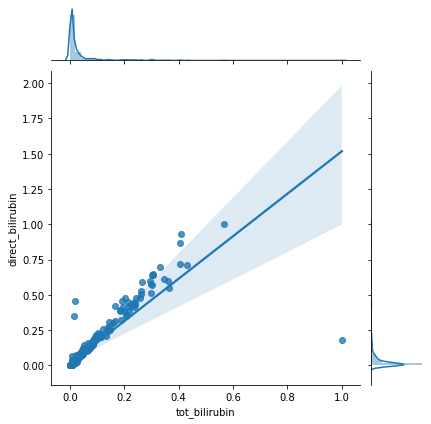

In [23]:
sns.jointplot("tot_bilirubin", "direct_bilirubin", data=data, kind="reg")

**Cancello attributi correlati**

In [0]:
data = data.drop(['direct_bilirubin', 'albumin', 'sgpt'], axis=1)

**Outlier - box plot (1 parte)**

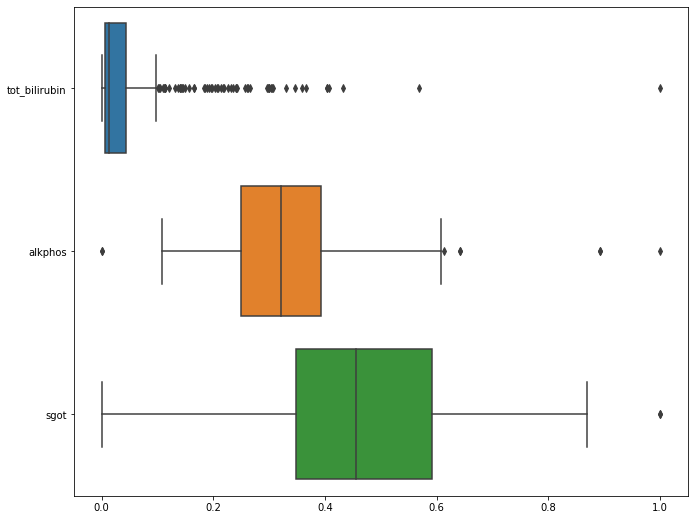

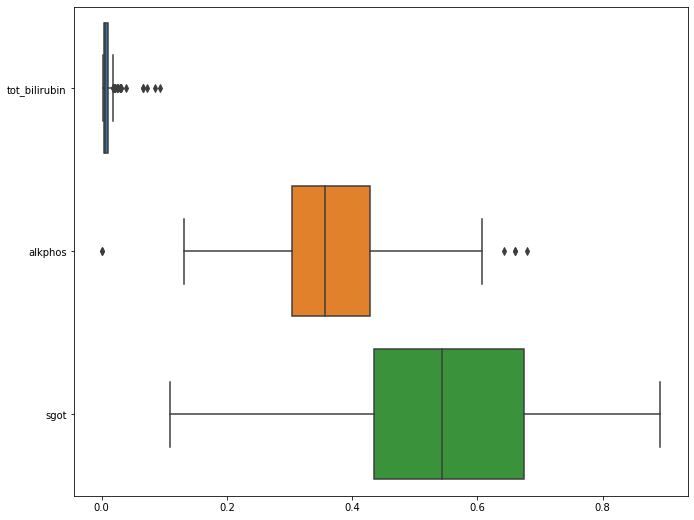

In [25]:
#Qui stampo i boxplot per il caso is_patient=1
f, ax = plt.subplots(figsize=(11, 9))
mask = (data['is_patient']==0)
data1 = data.loc[mask, ['tot_bilirubin', 'alkphos', 'sgot']]
ax = sns.boxplot(data=data1[['tot_bilirubin', 'alkphos', 'sgot']], orient="h")

#Qui stampo i boxplot per il caso is_patient=2
f2, ax2 = plt.subplots(figsize=(11, 9))
mask = (data['is_patient']==1)
data1 = data.loc[mask, ['tot_bilirubin', 'alkphos', 'sgot']]
ax2 = sns.boxplot(data=data1[['tot_bilirubin', 'alkphos', 'sgot']], orient="h")


**Outlier - box plot (2 parte)**

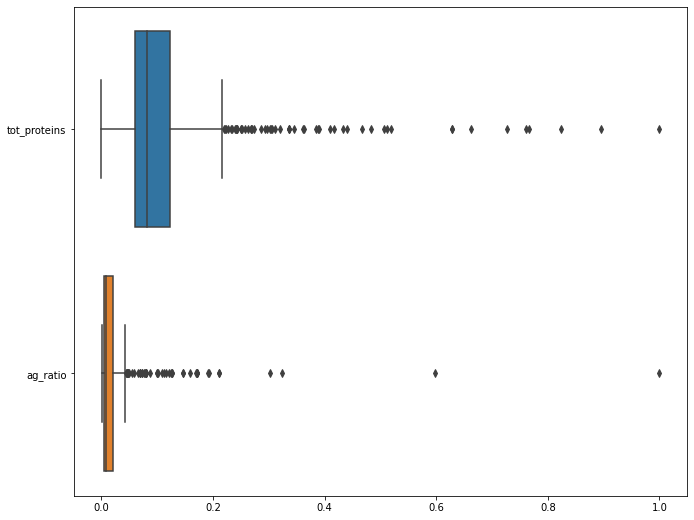

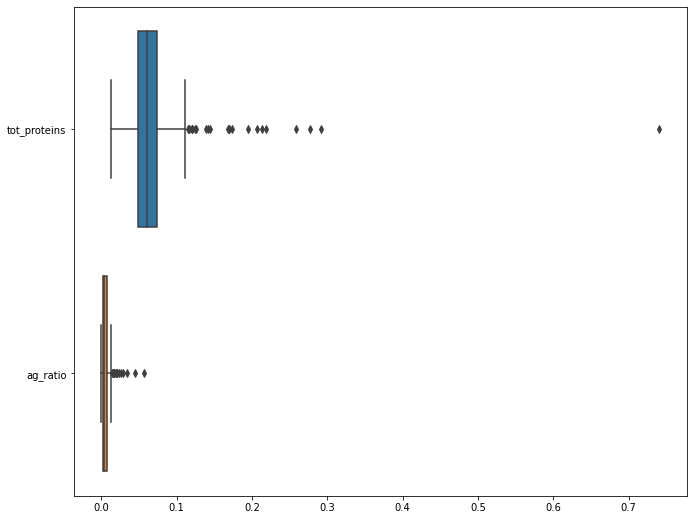

In [26]:
#Qui stampo i boxplot per il caso is_patient=1
f, ax = plt.subplots(figsize=(11, 9))
mask = (data['is_patient']==0)
data1 = data.loc[mask, ['tot_proteins', 'ag_ratio']]
ax = sns.boxplot(data=data1[['tot_proteins', 'ag_ratio']], orient="h")

#Qui stampo i boxplot per il caso is_patient=2
f2, ax2 = plt.subplots(figsize=(11, 9))
mask = (data['is_patient']==1)
data1 = data.loc[mask, ['tot_proteins', 'ag_ratio']]
ax2 = sns.boxplot(data=data1[['tot_proteins', 'ag_ratio']], orient="h")


**Test and split**

In [27]:
from sklearn.model_selection import train_test_split
X = data.drop('is_patient', axis=1).values
y = data['is_patient'].values

#Divido il set in train e test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=0)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(466, 7)
(466,)
(117, 7)
(117,)


**Standardize - StandardScaler()**

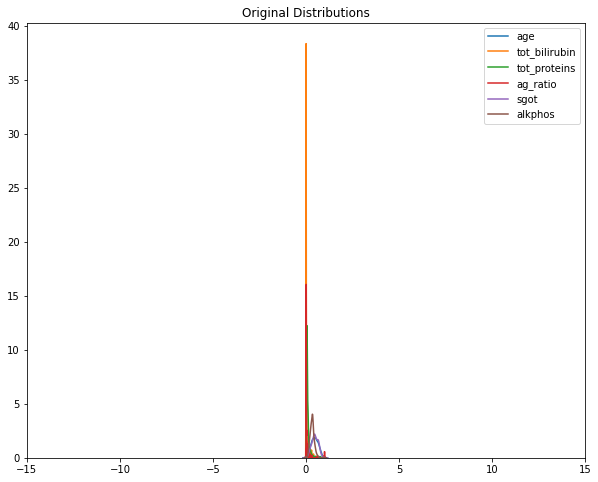

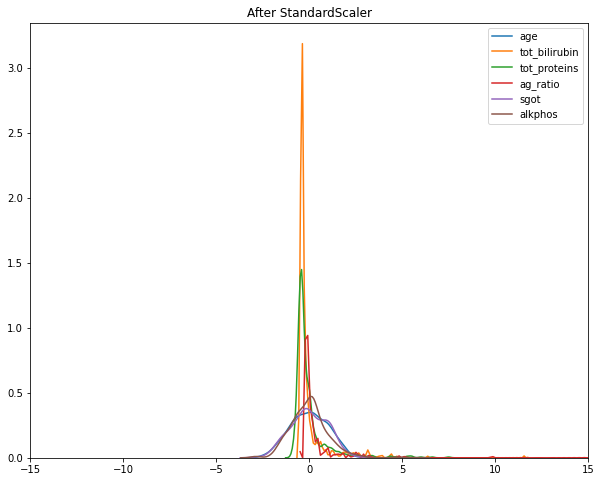

In [28]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns

col_names = list(data.columns)

# Stampo senza standardizzare

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
fig = set(xlim(-15,15))
ax1.set_title('Original Distributions')
sns.kdeplot(data['age'], ax=ax1)
sns.kdeplot(data['tot_bilirubin'], ax=ax1)
sns.kdeplot(data['tot_proteins'], ax=ax1)
sns.kdeplot(data['ag_ratio'], ax=ax1)
sns.kdeplot(data['sgot'], ax=ax1)
sns.kdeplot(data['alkphos'], ax=ax1)

#Adesso standardizzo
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

X=data;

X = ss.fit_transform(X)
X = pd.DataFrame(X, columns=col_names)
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
fig = set(xlim(-15,15))
ax1.set_title('After StandardScaler')
sns.kdeplot(X['age'], ax=ax1)
sns.kdeplot(X['tot_bilirubin'], ax=ax1)
sns.kdeplot(X['tot_proteins'], ax=ax1)
sns.kdeplot(X['ag_ratio'], ax=ax1)
sns.kdeplot(X['sgot'], ax=ax1)
sns.kdeplot(X['alkphos'], ax=ax1)


**PCA (n_components=None)** per vederne la varianza

In [29]:
#Percentuale di varianza rispetto ad ogni componente principale
#rispetto alla varianza comulativa di tutte le componenti
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print("Explained Variance:\n", explained_variance)

Explained Variance:
 [0.2903902  0.17530184 0.15084776 0.12498452 0.10872371 0.10345407
 0.0462979 ]


Text(0.5, 0, 'Componenti principali')

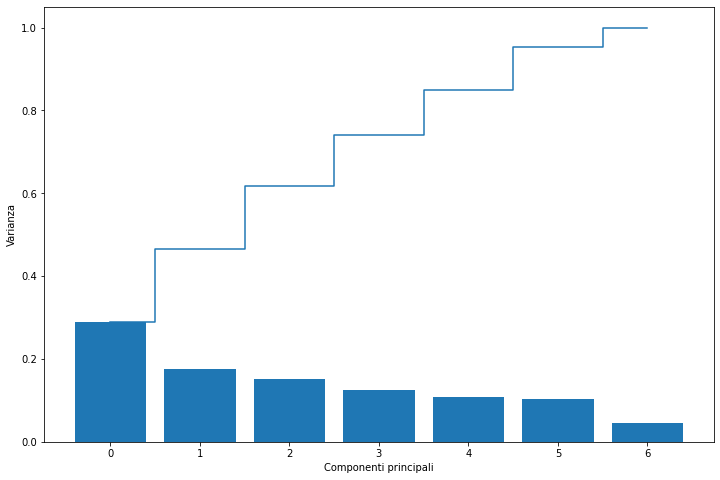

In [37]:
plt.figure(figsize=(12,8))
plt.step(range(0,7), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.bar(range(0,7), pca.explained_variance_ratio_)
plt.ylabel("Varianza")
plt.xlabel("Componenti principali")

**PCA**


In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
pc_train = pca.fit_transform(X_train)
pc_test = pca.fit_transform(X_test)


**K-Fold - LogisticRegression**

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
kfold = StratifiedKFold(n_splits=10, random_state=1)
scores=[]
for k,(train, test) in enumerate(kfold.split(pc_train, y_train)):
  lr.fit(pc_train[train], y_train[train])
  score = lr.score(pc_train[test], y_train[test])
  scores.append(score)
  print("Fold %d: Accuracy=%.4f" % (k,score))

accuracy = np.array(scores).mean()
print("Validation accuracy = %.4f" % accuracy)

'''
Il numero di esempi appartenenti ad una determinata classe in ogni k-fold potrebbe
essere sbilanciata, per questo usiamo la classe StratifiedKFold. Il risultato
nell'esempio in questione non cambia di molto le cose
'''



Fold 0: Accuracy=0.7021
Fold 1: Accuracy=0.7234
Fold 2: Accuracy=0.7234
Fold 3: Accuracy=0.7234
Fold 4: Accuracy=0.7447
Fold 5: Accuracy=0.7447
Fold 6: Accuracy=0.7391
Fold 7: Accuracy=0.6957
Fold 8: Accuracy=0.7609
Fold 9: Accuracy=0.7391
Validation accuracy = 0.7296


"\nIl numero di esempi appartenenti ad una determinata classe in ogni k-fold potrebbe\nessere sbilanciata, per questo usiamo la classe StratifiedKFold. Il risultato\nnell'esempio in questione non cambia di molto le cose\n"

In [0]:
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()
score = cross_val_score(lr, pc_train, y_train, cv=10)
print(score)
print(score.mean())

lr.fit(pc_train, y_train)

[0.70212766 0.72340426 0.72340426 0.72340426 0.74468085 0.74468085
 0.73913043 0.69565217 0.76086957 0.73913043]
0.7296484736355227


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_fscore_support
from sklearn.metrics import log_loss

y_pred = lr.predict(pc_test)
y_pred_proba = lr.predict(pc_test)

print("Accuracy: " + str(accuracy_score(y_test, y_pred)))
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)
print("Classification Report: \n", classification_report(y_test, y_pred))

Accuracy: 0.7008547008547008
[[68 10]
 [25 14]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.73      0.87      0.80        78
         1.0       0.58      0.36      0.44        39

    accuracy                           0.70       117
   macro avg       0.66      0.62      0.62       117
weighted avg       0.68      0.70      0.68       117



**Classificazione con diversi modelli predittivi**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(("LR",LogisticRegression()))
models.append(("NB",GaussianNB()))
models.append(("KNN",KNeighborsClassifier(n_neighbors=5)))
models.append(("DT",DecisionTreeClassifier()))
models.append(("SVM",SVC()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('RFC', RandomForestClassifier()))

for name, model in models:
  kfold = KFold(n_splits=10 , random_state=0)
  cv_result = cross_val_score(model, pc_train, y_train, cv=kfold, scoring='accuracy')
  print("{} ha una accuratezza sul train del: {:0.2f}".format(name,cv_result.mean()))

LR ha una accuratezza sul train del: 0.73
NB ha una accuratezza sul train del: 0.58
KNN ha una accuratezza sul train del: 0.65
DT ha una accuratezza sul train del: 0.63
SVM ha una accuratezza sul train del: 0.73
LDA ha una accuratezza sul train del: 0.72
RFC ha una accuratezza sul train del: 0.68


**Classificazione - (kNN)**

In [0]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(pc_train, y_train)
y_test_pred = clf.predict(pc_test);
print(accuracy_score(y_test, y_test_pred))
p,r,f1,s = precision_recall_fscore_support(y_test,y_test_pred)
conf_mat = confusion_matrix(y_test, y_test_pred)
print(conf_mat)
print("Classification Report: \n", classification_report(y_test, y_test_pred))

0.6752136752136753
[[77  1]
 [37  2]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.68      0.99      0.80        78
         1.0       0.67      0.05      0.10        39

    accuracy                           0.68       117
   macro avg       0.67      0.52      0.45       117
weighted avg       0.67      0.68      0.57       117



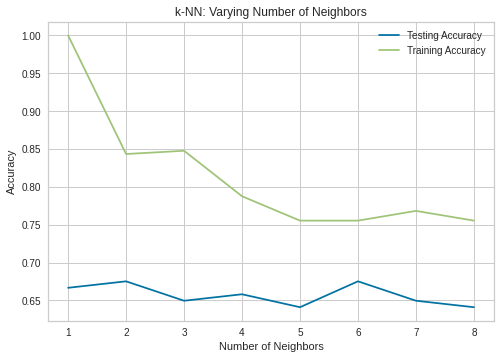

In [0]:
k_values = np.arange(1,9)
#train_accuracy = []
#test_accuracy = []
for i,k in enumerate (k_values):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(pc_train, y_train)
  train_accuracy.append(knn.score(pc_train, y_train))
  test_accuracy.append(knn.score(pc_test, y_test))

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

**Troviamo il miglior classificatore usando GridSearchCV**

In [0]:
params_clfs = list()

svm_params=[{'kernel': ['rbf'], 'gamma':[1e-3,1e-4]},
            {'kernel': ['linear'], 'C':[1,10,100,1000]}
]
params_clfs.append((SVC(), svm_params))

lr_params = {'penalty':['l1','l2'], 'C':np.logspace(0,4,10)}
params_clfs.append((LogisticRegression(),lr_params))

clf=DecisionTreeClassifier()
dt_params = {'max_features': ['auto', 'sqrt','log2'],
             'min_samples_split':[2,3,4,5,6,7,8,9,10,11,12,13,14,15],
             'min_samples_leaf':[1],
             'random_state':[12]}
params_clfs.append((DecisionTreeClassifier(), dt_params))

rfc_params = [{'criterion':['gini', 'entropy'],
               'max_depth':[5,6,7,8,9,10,11,12],
               'max_features':[1,2,3],
               'n_estimators': [14,15,16,17,18,19],
               'random_state': [7,8,9,10,11,12,13]}]
params_clfs.append((RandomForestClassifier(), rfc_params))


**GridSearchCV per ricerca degli iperparametri (mediante uso di k-Fold)**

In [0]:
from sklearn.model_selection import GridSearchCV

for clf,param in params_clfs:
  grid_search = GridSearchCV(clf,param, cv=10)
  grid_search.fit(pc_train, y_train)
  print(80*"*")
  print("{} GridSearchCV:".format(clf.__class__.__name__))
  print("best params:{}".format(grid_search.best_params_))
  test_means = grid_search.cv_results_['mean_test_score']
  print('Risultato medio:{:.2f}'.format(np.mean(test_means)))
  y_pred = grid_search.predict(pc_test)
  print('Milgior parametro:{:.2f}'.format(accuracy_score(y_test,y_pred)))
  print('Confusion Matrix:\n{}'.format(confusion_matrix(y_test,y_pred)))
  print('Classification report:\n{}'.format(classification_report(y_test,y_pred)))
  print(80*'*')

********************************************************************************
SVC GridSearchCV:
best params:{'gamma': 0.001, 'kernel': 'rbf'}
Risultato medio:0.73
Milgior parametro:0.67
Confusion Matrix:
[[78  0]
 [39  0]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        78
         1.0       0.00      0.00      0.00        39

    accuracy                           0.67       117
   macro avg       0.33      0.50      0.40       117
weighted avg       0.44      0.67      0.53       117

********************************************************************************
********************************************************************************
LogisticRegression GridSearchCV:
best params:{'C': 2.7825594022071245, 'penalty': 'l2'}
Risultato medio:nan
Milgior parametro:0.70
Confusion Matrix:
[[68 10]
 [25 14]]
Classification report:
              precision    recall  f1-score   support

         0.0    

**LDA**

In [0]:
clf = LinearDiscriminantAnalysis(n_components=None)
clf.fit(pc_train,y_train)
y_pred = clf.predict(pc_test)
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusione matrix:\n{}".format(confusion_matrix(y_test,y_pred)))
print("Classification report:\n{}".format(classification_report(y_test,y_pred)))

Accuracy Score: 0.68
Confusione matrix:
[[78  0]
 [37  2]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.68      1.00      0.81        78
         1.0       1.00      0.05      0.10        39

    accuracy                           0.68       117
   macro avg       0.84      0.53      0.45       117
weighted avg       0.79      0.68      0.57       117



**Decision Tree**

In [0]:
clf = DecisionTreeClassifier(max_features='auto', min_samples_leaf=1, min_samples_split=5, max_depth=3, random_state=12)
clf.fit(pc_train, y_train)
y_pred = clf.predict(pc_test)
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusione matrix:\n{}".format(confusion_matrix(y_test,y_pred)))
print("Classification report:\n{}".format(classification_report(y_test,y_pred)))

Accuracy Score: 0.67
Confusione matrix:
[[78  0]
 [39  0]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        78
         1.0       0.00      0.00      0.00        39

    accuracy                           0.67       117
   macro avg       0.33      0.50      0.40       117
weighted avg       0.44      0.67      0.53       117



**Plot tree**

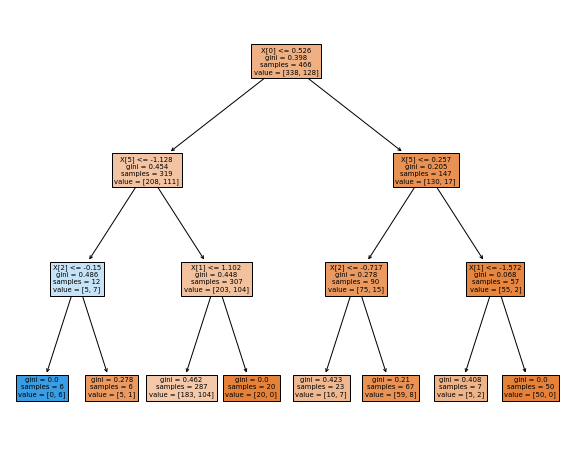

In [0]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
plt.figure(figsize=(10, 8))
plot_tree(clf, filled=True)
plt.show()

**Random Forest Classifier**

In [0]:
random_forest = RandomForestClassifier(criterion='gini', max_depth=5, max_features=1, n_estimators=16, random_state=12)
random_forest.fit(pc_train, y_train)
y_pred = random_forest.predict(pc_test)
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusione matrix:\n{}".format(confusion_matrix(y_test,y_pred)))
print("Classification report:\n{}".format(classification_report(y_test,y_pred)))

random_forest_score = round(random_forest.score(pc_train, y_train) * 100, 2)
random_forest_score_test = round(random_forest.score(pc_test, y_test) * 100, 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy Score: 0.67
Confusione matrix:
[[78  0]
 [39  0]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        78
         1.0       0.00      0.00      0.00        39

    accuracy                           0.67       117
   macro avg       0.33      0.50      0.40       117
weighted avg       0.44      0.67      0.53       117

Random Forest Score: 
 75.11
Random Forest Test Score: 
 66.67
Accuracy: 
 0.6666666666666666
[[78  0]
 [39  0]]
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        78
         1.0       0.00      0.00      0.00        39

    accuracy                           0.67       117
   macro avg       0.33      0.50      0.40       117
weighted avg       0.44      0.67      0.53       117



**SVC**

In [0]:
best_clf = SVC(gamma=0.001, kernel='rbf')
best_clf.fit(pc_train, y_train)
y_pred = best_clf.predict(pc_test)
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusione matrix:\n{}".format(confusion_matrix(y_test,y_pred)))
print("Classification report:\n{}".format(classification_report(y_test,y_pred)))

Accuracy Score: 0.67
Confusione matrix:
[[78  0]
 [39  0]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.67      1.00      0.80        78
         1.0       0.00      0.00      0.00        39

    accuracy                           0.67       117
   macro avg       0.33      0.50      0.40       117
weighted avg       0.44      0.67      0.53       117



**LogisticRegression**

In [0]:
best_clf = LogisticRegression(C=21, penalty='l2')
best_clf.fit(pc_train, y_train)
y_pred = best_clf.predict(pc_test)
print("Accuracy Score: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Confusione matrix:\n{}".format(confusion_matrix(y_test,y_pred)))
print("Classification report:\n{}".format(classification_report(y_test,y_pred)))

Accuracy Score: 0.69
Confusione matrix:
[[68 10]
 [26 13]]
Classification report:
              precision    recall  f1-score   support

         0.0       0.72      0.87      0.79        78
         1.0       0.57      0.33      0.42        39

    accuracy                           0.69       117
   macro avg       0.64      0.60      0.61       117
weighted avg       0.67      0.69      0.67       117



**Learning curve**

In [0]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(KNeighborsClassifier(n_neighbors=2),
              pc_train, y_train, cv=10, scoring='accuracy', n_jobs=-1, 
              train_sizes=np.linspace(0.01,1,50), verbose=1)

'''
I parametri ritornati dalla funzione learning_curve sono:
- train_sizes --> numbers of training examples that has been used to generate the learning curve.
  Note that the number of ticks might be less than n_ticks because duplicate entries will be removed.
- train_scores --> scores on training sets
- test_scores --> scores on test set
'''

[learning_curve] Training set sizes: [  4  12  21  29  38  46  54  63  71  80  88  97 105 114 122 131 139 148
 156 165 173 181 190 198 207 215 224 232 241 249 258 266 275 283 292 300
 308 317 325 334 342 351 359 368 376 385 393 402 410 419]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    6.9s finished


'\nI parametri ritornati dalla funzione learning_curve sono:\n- train_sizes --> numbers of training examples that has been used to generate the learning curve.\n  Note that the number of ticks might be less than n_ticks because duplicate entries will be removed.\n- train_scores --> scores on training sets\n- test_scores --> scores on test set\n'

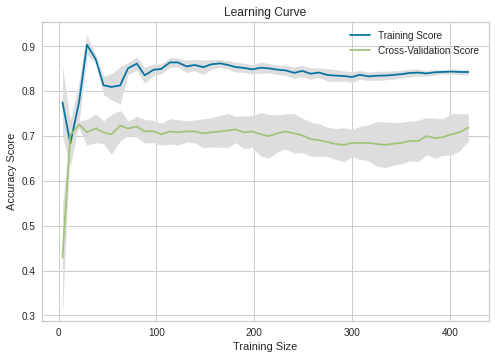

In [0]:
train_mean = np.mean(train_scores, axis=1)
train_mean

train_std = np.std(train_scores, axis=1)
train_std

test_mean = np.mean(test_scores, axis=1)
test_mean

test_std = np.std(test_scores, axis=1)
test_std

plt.plot(train_sizes, train_mean, label= 'Training Score')
plt.plot(train_sizes, test_mean, label = 'Cross-Validation Score')
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color='#DDDDDD')
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color='#DDDDDD')

plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend(loc='best')


**ROC ve AUC**

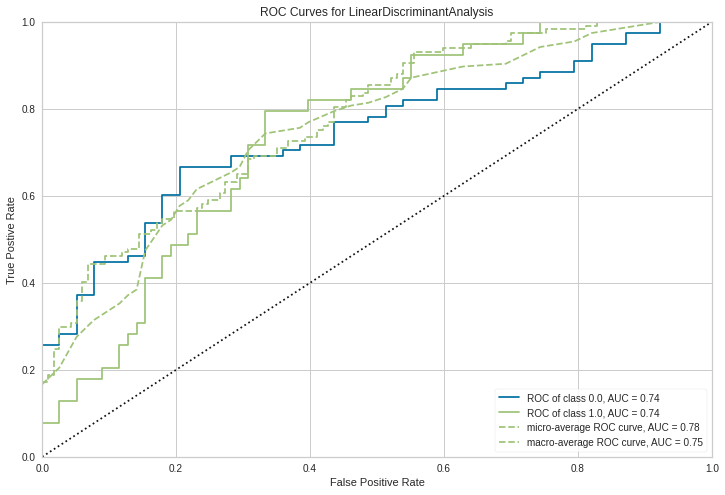

In [0]:
from yellowbrick.classifier import ROCAUC

fig, ax = plt.subplots(1,1,figsize=(12,8))
roc_auc = ROCAUC(clf, ax=ax)
roc_auc.fit(pc_train, y_train)
roc_auc.score(pc_test,y_test)

roc_auc.poof()